## Dog or Not Dog [shiv]

In [1]:
from imgdata import ImgData
import numpy as np

In [2]:
idata= ImgData("data/dog/")

In [3]:
idata.get_all_files()

Total 1001 image files found


In [4]:
#idata.plot_sample(rows=2, cols=4)

In [5]:
idata.process(count=50, silent= True)

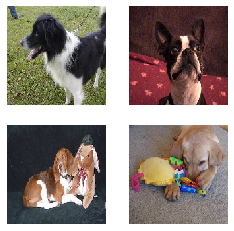

In [6]:
idata.plot_processed_sample(count= 4)

In [7]:
nps= idata.to_numpy(silent=True)

In [10]:
data= np.array([a for a in nps])
data.shape

(50, 150, 150, 3)

In [11]:
import matplotlib.pyplot as plt

In [12]:
data[0].shape

(150, 150, 3)

In [21]:
data[0][0].shape

(150, 3)

In [27]:
data[0][:].shape

(150, 150, 3)

In [31]:
id= data[0]
id.shape

(150, 150, 3)

In [34]:
id.ndim

3

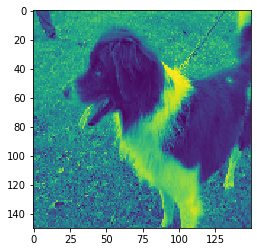

In [46]:
plt.imshow(id[:,:,0])